In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [179]:
teams = pd.read_csv("teams.csv")
players = pd.read_csv("players.csv")
pitchers = pd.read_csv("pitching.csv")

# Do the data cleaning on all those values, for Florida Marlines, change its ID to FLO for coherence.
teams.teamID = teams.teamID.replace('MIA','FLO')
players.teamID = players.teamID.replace('MIA','FLO')
pitchers.teamID = pitchers.teamID.replace('MIA','FLO')

In [180]:
# Task 1 
# 1.1)  Compute the number of wins for all teams in MLB in 2010-2015, display them in a descending sorted order. 
recent_years = teams['yearID']>2009
team_group = teams[recent_years][['teamID','franchName','G','W','L']].groupby(['teamID','franchName']).sum()
team_winloss_data = team_group.sort_values(by ='W', ascending = False).reset_index().rename(columns={'G':'Total Games from 2010-2015','W':'Total Wins from 2010-2015','L':'Total Losses from 2010-2015'})
team_winloss_data



,teamID,franchName,Total Games from 2010-2015,Total Wins from 2010-2015,Total Losses from 2010-2015
0,SLN,St. Louis Cardinals,972,551,421
1,NYA,New York Yankees,972,543,429
2,LAN,Los Angeles Dodgers,971,526,445
3,TBA,Tampa Bay Rays,973,526,447
4,TEX,Texas Rangers,973,525,448
5,DET,Detroit Tigers,971,521,450
6,SFN,San Francisco Giants,972,520,452
7,ATL,Atlanta Braves,972,516,456
8,LAA,Los Angeles Angels of Anaheim,972,516,456
9,WAS,Washington Nationals,971,512,459


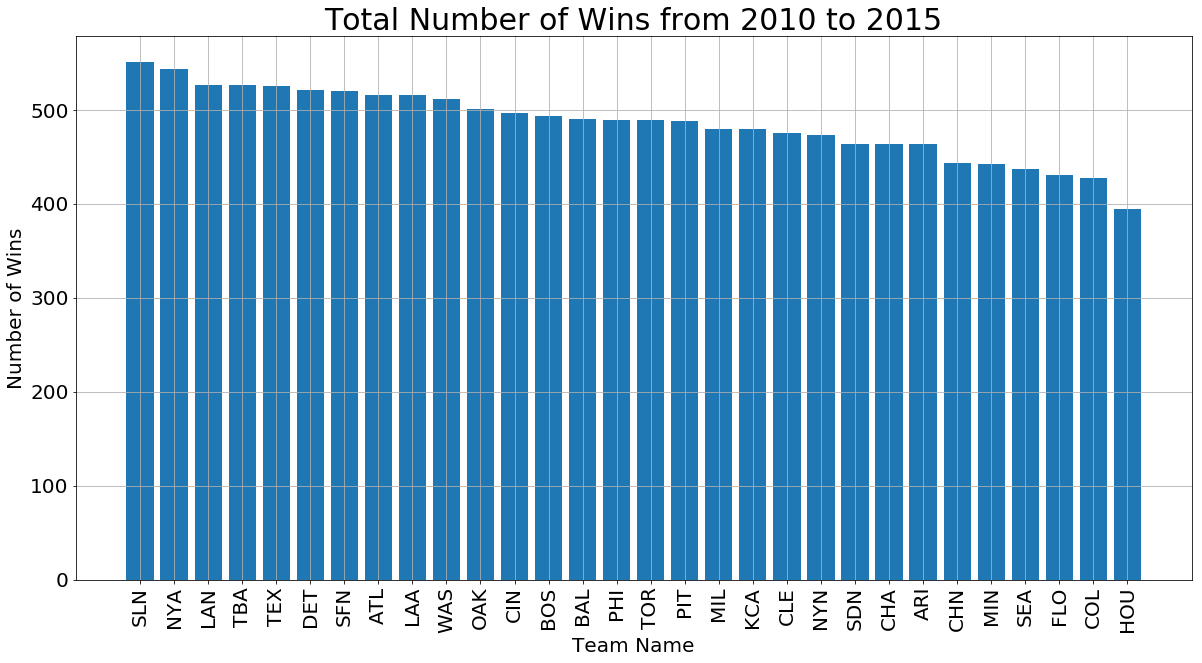

In [181]:
#Visualization
plt.figure(figsize = (20,10))
plt.bar(range(30),team_winloss_data['Total Wins from 2010-2015'])
plt.xticks(range(30),team_winloss_data['teamID'],fontsize=20,rotation = 90)
plt.yticks(fontsize=20)
plt.title('Total Number of Wins from 2010 to 2015',fontsize=30)
plt.xlabel('Team Name',fontsize=20)
plt.ylabel('Number of Wins',fontsize=20)
plt.grid()
plt.show()

In [182]:
# 1.2)  Compute the average payroll per year for all teams in 2010-2015, displaying them in a descending sorted order 
players
year_range = players['yearID'] >2009
players_recent =  players[year_range]
new_df = players_recent[['teamID','salary','yearID' ]].groupby(['teamID','yearID']).sum().reset_index().reset_index(drop=True)
new_df2= new_df[['teamID','salary']].groupby('teamID').mean().sort_values(by =['salary'], ascending = False).reset_index().rename(columns={'salary':'Average salaries per year'})
new_df2

,teamID,Average salaries per year
0,NYA,2.049868e+08
1,PHI,1.581028e+08
2,LAN,1.578266e+08
3,BOS,1.556429e+08
4,DET,1.356950e+08
5,SFN,1.326529e+08
6,LAA,1.261684e+08
7,CHA,1.072180e+08
8,CHN,1.066681e+08
9,TEX,1.050434e+08


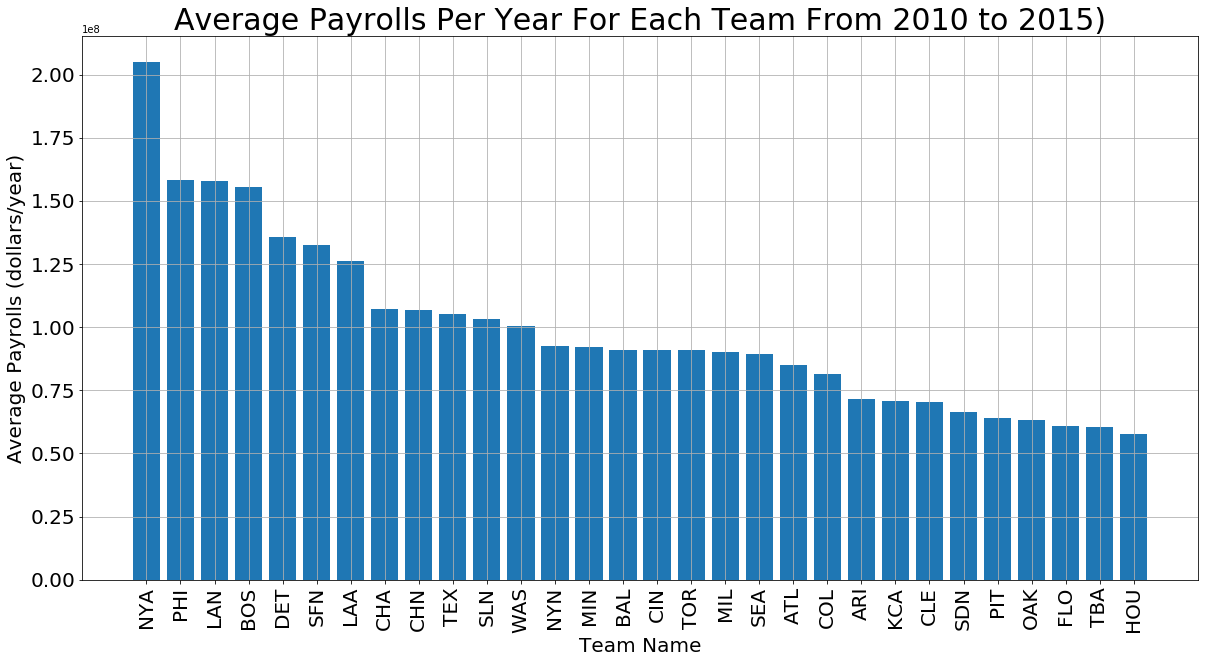

In [183]:
#Visualization
plt.figure(figsize = (20,10))
plt.bar(range(30),new_df2['Average salaries per year'])
plt.xticks(range(30),new_df2['teamID'],fontsize=20,rotation = 90)
plt.yticks(fontsize=20)
plt.title('Average Payrolls Per Year For Each Team From 2010 to 2015)',fontsize=30)
plt.xlabel('Team Name',fontsize=20)
plt.ylabel('Average Payrolls (dollars/year)',fontsize=20)
plt.grid()
plt.show()

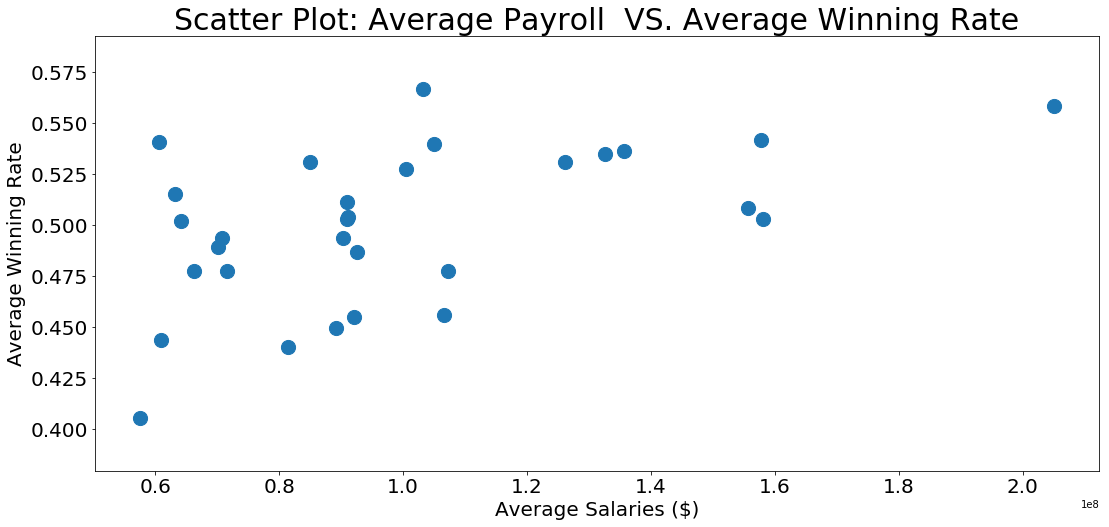

In [184]:
# 1.3)  Create a visualization of your choice which will all allow you to show whether a team's winning record is related to its payroll. 
team_winloss_data['Total Win Rate']= team_winloss_data['Total Wins from 2010-2015']/ team_winloss_data['Total Games from 2010-2015']
# team_winloss_data['Average Win Rate'] = team_winloss_data['Total Win Rate']
new_df1= new_df2.merge(team_winloss_data)
N=30
# new_df['Total Salaries'] =new_df['salary']*6 
plt.figure(figsize=(18,8))
colors = np.random.rand(N) #generate colors randomly
plt.scatter(y=new_df1['Total Win Rate'], x=new_df1['Average salaries per year'],s=200)
plt.ylabel('Average Winning Rate',fontsize=20)
plt.xlabel('Average Salaries ($)',fontsize=20)
plt.title('Scatter Plot: Average Payroll  VS. Average Winning Rate',fontsize=30)
#get different colors
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# From the scatter plot, we can conclude the winning tate for a team has weakly or lower mediumly positive leanearly relationship with its average payroll. 
# The dots are between positive related and arbitrarily distributed in the plane. It is noisy.


In [185]:
# Task 2 
# 2.1)  Compute the Batting Averages  forall the MLB teams in 2010-2015, display them in a descending sorted order. The Batting Average is defined as Hits/At Bats. The average is calculated from all players in each team. 


players_recent = players[year_range]
new_df = players_recent[['teamID','H','AB']].groupby('teamID').sum().reset_index()
new_df['Batting Success Rate'] = new_df['H']/new_df['AB']
team_batting_data = new_df.sort_values(by ='Batting Success Rate', ascending = False).rename(columns={'H':' Hits','AB':' At Bats','Batting Success Rate':'Average Batting Success Rate'})
team_batting_data

,teamID,Hits,At Bats,Average Batting Success Rate
9,DET,9219,33652,0.273951
27,TEX,8965,33440,0.268092
8,COL,8948,33434,0.267632
12,KCA,8982,33581,0.267473
3,BOS,8986,33802,0.265842
25,SLN,8746,33163,0.263728
24,SFN,8572,33172,0.258411
13,LAA,8546,33194,0.257456
14,LAN,8401,32736,0.256629
15,MIL,8460,33026,0.256162


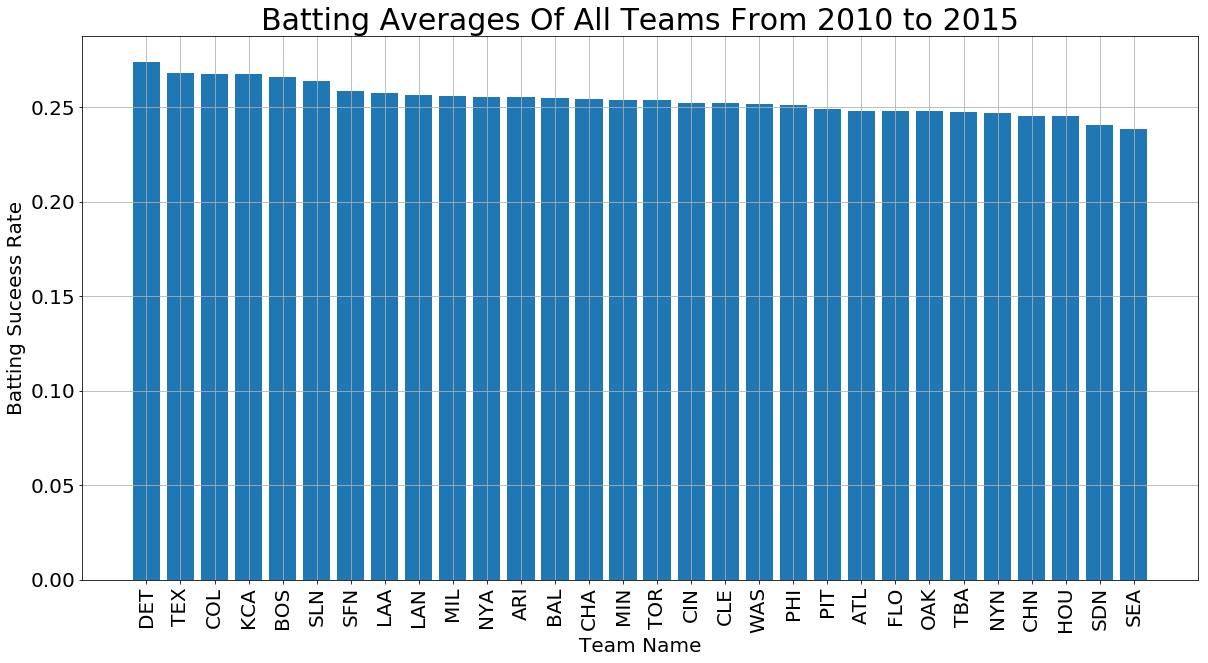

In [186]:
# Visualization
plt.figure(figsize = (20,10))
plt.bar(range(30),team_batting_data['Average Batting Success Rate'])
plt.xticks(range(30),team_batting_data['teamID'],fontsize=20,rotation = 90)
plt.yticks(fontsize=20)
plt.title('Batting Averages Of All Teams From 2010 to 2015',fontsize=30)
plt.xlabel('Team Name',fontsize=20)
plt.ylabel('Batting Suceess Rate',fontsize=20)
plt.grid()
plt.show()

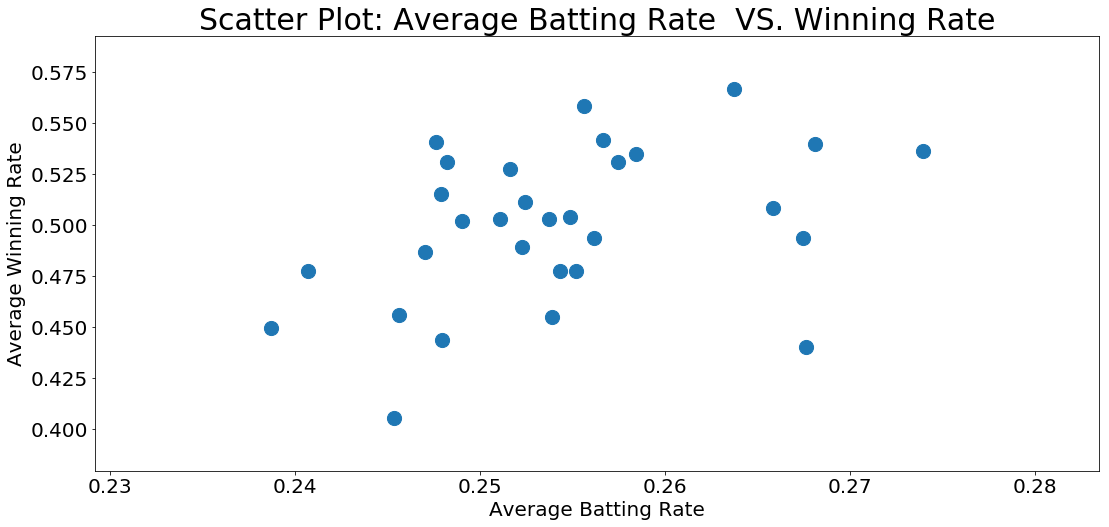

In [187]:
# 2.2) Create a visualization of your choice which will allow you to decide whether a team's batting average is related to its win-loss record. 
teams_ana = team_batting_data.merge(team_winloss_data)
# teams_anaalysis
#draw a dot plot for the relation
N = 30
plt.figure(figsize=(18,8))
colors = np.random.rand(N) #generate colors randomly
plt.scatter(teams_ana['Average Batting Success Rate'], teams_ana['Total Win Rate'],s=200)
plt.xlabel('Average Batting Rate',fontsize=20)
plt.ylabel('Average Winning Rate',fontsize=20)
plt.title('Scatter Plot: Average Batting Rate  VS. Winning Rate',fontsize=30)
#get different colors
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(loc='best',fontsize=20)
plt.show()

# Answer:
# They (team's batting rate and win-loss record) do not have strong relationship with each other, we can see that the dots are between arbitrarily distributed 
# and positively related pattern. Batting Average is weakly to mediumly positively related to Winning records. It is noisy.

In [188]:
# Task 3 
pitchers_recent = pitchers[pitchers['yearID']>2009]
# 3.1) Display the average ERA (Earned Run Average) per team for all the MLB teams in 2010-2015, in a descending sorted order. A lower ERA indicates a better pitching performance. 

team_ERA = teams[recent_years]
new_team_ERA = team_ERA[['teamID','ERA']].groupby(['teamID']).mean().reset_index()
final_team_ERA=new_team_ERA.rename(columns={'ERA':'Average ERA 2010-2015'}).sort_values(by="Average ERA 2010-2015",ascending=False)
final_team_ERA

,teamID,Average ERA 2010-2015
8,COL,4.685000
16,MIN,4.415000
11,HOU,4.271667
28,TOR,4.205000
3,BOS,4.201667
2,BAL,4.176667
0,ARI,4.126667
4,CHA,4.076667
12,KCA,4.066667
7,CLE,4.060000


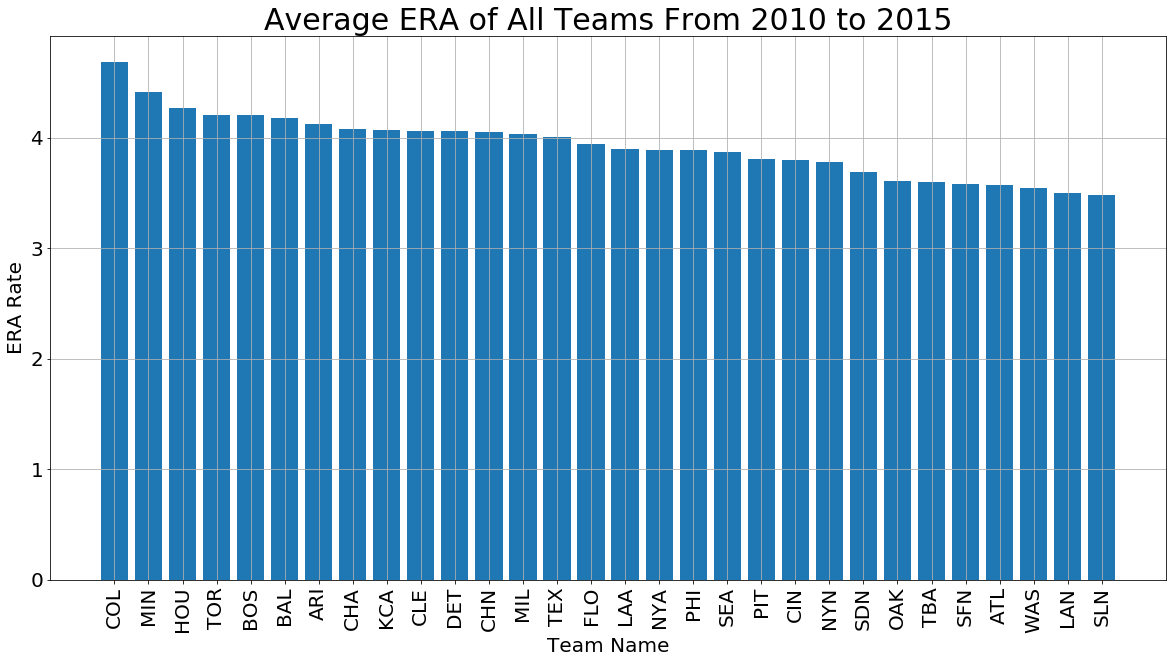

In [189]:
# Visualization
plt.figure(figsize = (20,10))
plt.bar(range(30),final_team_ERA['Average ERA 2010-2015'])
plt.xticks(range(30),final_team_ERA['teamID'],fontsize=20,rotation = 90)
plt.yticks(fontsize=20)
plt.title('Average ERA of All Teams From 2010 to 2015',fontsize=30)
plt.xlabel('Team Name',fontsize=20)
plt.ylabel('ERA Rate',fontsize=20)
plt.grid()
plt.show()

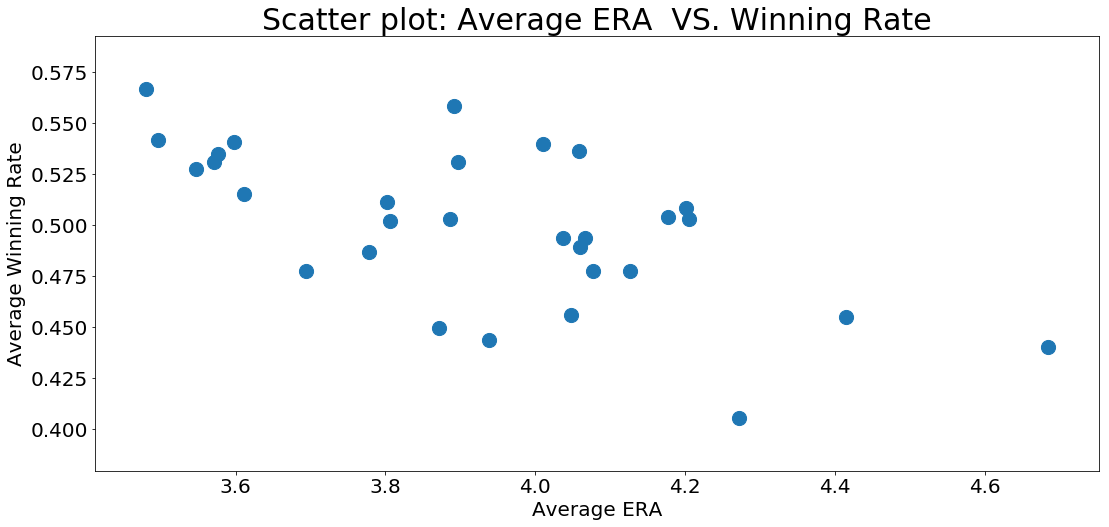

In [190]:
# 3.2) Create a visualization of your choice which will allow you to decide if a team's win-loss record is related to its pitching performance. 
# ERA_teams=pitchers_recent[['teamID','ERA','G']].groupby(['teamID']).sum().reset_index()
# ERA_teams['Team Average ERA'] = ERA_teams['ERA']/ERA_teams['G']
# ERA_teams

ERA_data = final_team_ERA.merge(team_winloss_data)

N = 30
plt.figure(figsize=(18,8))
colors = np.random.rand(N) #generate colors randomly
plt.scatter(ERA_data['Average ERA 2010-2015'], ERA_data['Total Win Rate'],s=200)
plt.xlabel('Average ERA',fontsize=20)
plt.ylabel('Average Winning Rate',fontsize=20)
plt.title('Scatter plot: Average ERA  VS. Winning Rate',fontsize=30)
#get different colors
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
# Answer:
# They (team's Average ERA rate and win-loss record) do not have strong negative relationship with each other, we can see that the dots are between arbitrarily distributed 
# and negative related. They are meduimly negatively related. It is noisy.

In [191]:
# Task 4
# Using visualization to show the following trend: For the top 5 teams that have the most total wins between 2010 and 2015: 
df = team_winloss_data.head()
# we just need to slect those data out from the df we have
# clean_df_two['WR']=clean_df_two['W']/clean_df_two['G']
teams_selected = df['teamID'].tolist()

clean_df_one = teams[recent_years]
# clean_df_one
clean_df_two=clean_df_one.loc[(clean_df_one['teamID']==teams_selected[0])|(clean_df_one['teamID']==teams_selected[1])|(clean_df_one['teamID']==teams_selected[2])|(clean_df_one['teamID']==teams_selected[3])|(clean_df_one['teamID']==teams_selected[4])]
# clean_df_two
# # clean_df.merge()

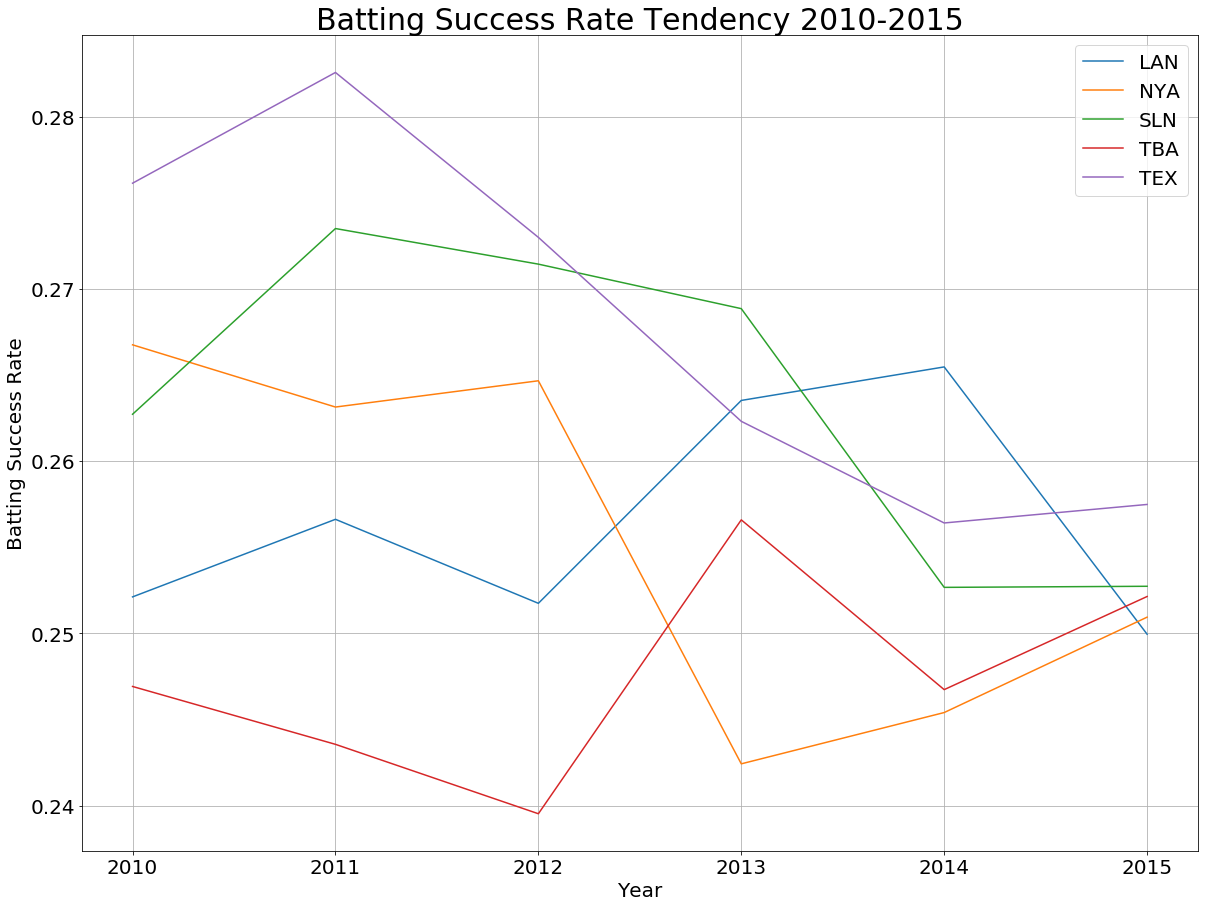

In [192]:
# 4.1) How are their Batting Averages changed from 2010-2015

clean_df_three=clean_df_two.groupby(['teamID','yearID']).sum().reset_index().sort_values(by='yearID')
# clean_df_three 
new_players = players_recent.groupby(['teamID','yearID']).sum().reset_index()
new_players['Batting Success Rate']= new_players['H']/new_players['AB']
clean_players=new_players.loc[(new_players['teamID']==teams_selected[0])|(new_players['teamID']==teams_selected[1])|(new_players['teamID']==teams_selected[2])|(new_players['teamID']==teams_selected[3])|(new_players['teamID']==teams_selected[4])]
# new_players = players_recent.groupby(['teamID','yearID']).sum().reset_index()
# teams_selected
# clean_players

fig,ax=plt.subplots(figsize=(20,15))
for key, grp in clean_players.groupby(['teamID']):
    ax=grp.plot(ax=ax,kind='line',x='yearID',y='Batting Success Rate',label=key)
plt.legend(loc='best',fontsize=20)
plt.title('Batting Success Rate Tendency 2010-2015',fontsize=30)
plt.ylabel('Batting Success Rate',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()
# new_players

#Use the line graph

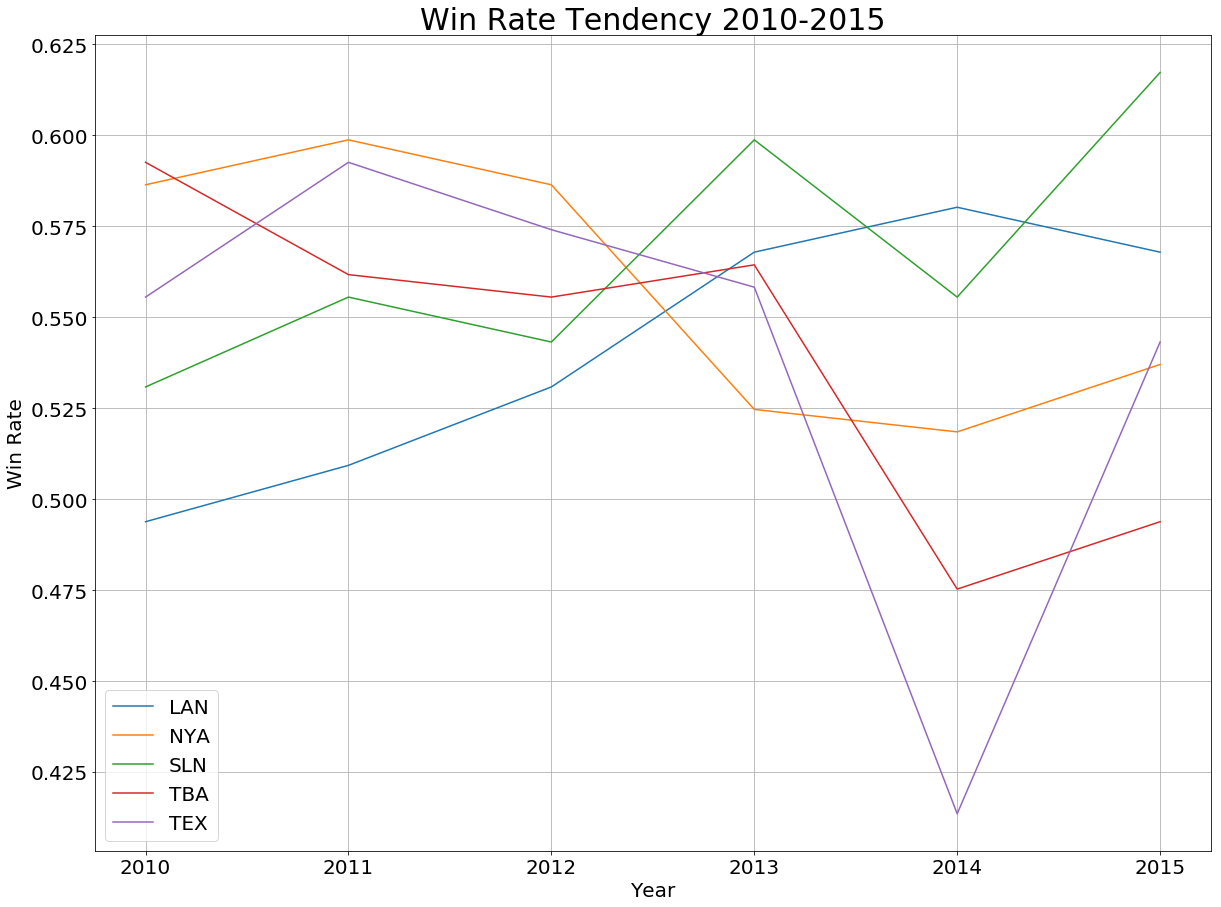

In [193]:
# 4.2) How are their Wins/Losses changed from 2010-2015 
clean_df_three['WR']=clean_df_three['W']/clean_df_three['G']
#Use the line graph

fig,ax=plt.subplots(figsize=(20,15))
for key, grp in clean_df_three.groupby(['teamID']):
    ax=grp.plot(ax=ax,kind='line',x='yearID',y='WR',label=key)
plt.legend(loc='best',fontsize=20)
plt.title('Win Rate Tendency 2010-2015',fontsize=30)
plt.ylabel('Win Rate',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

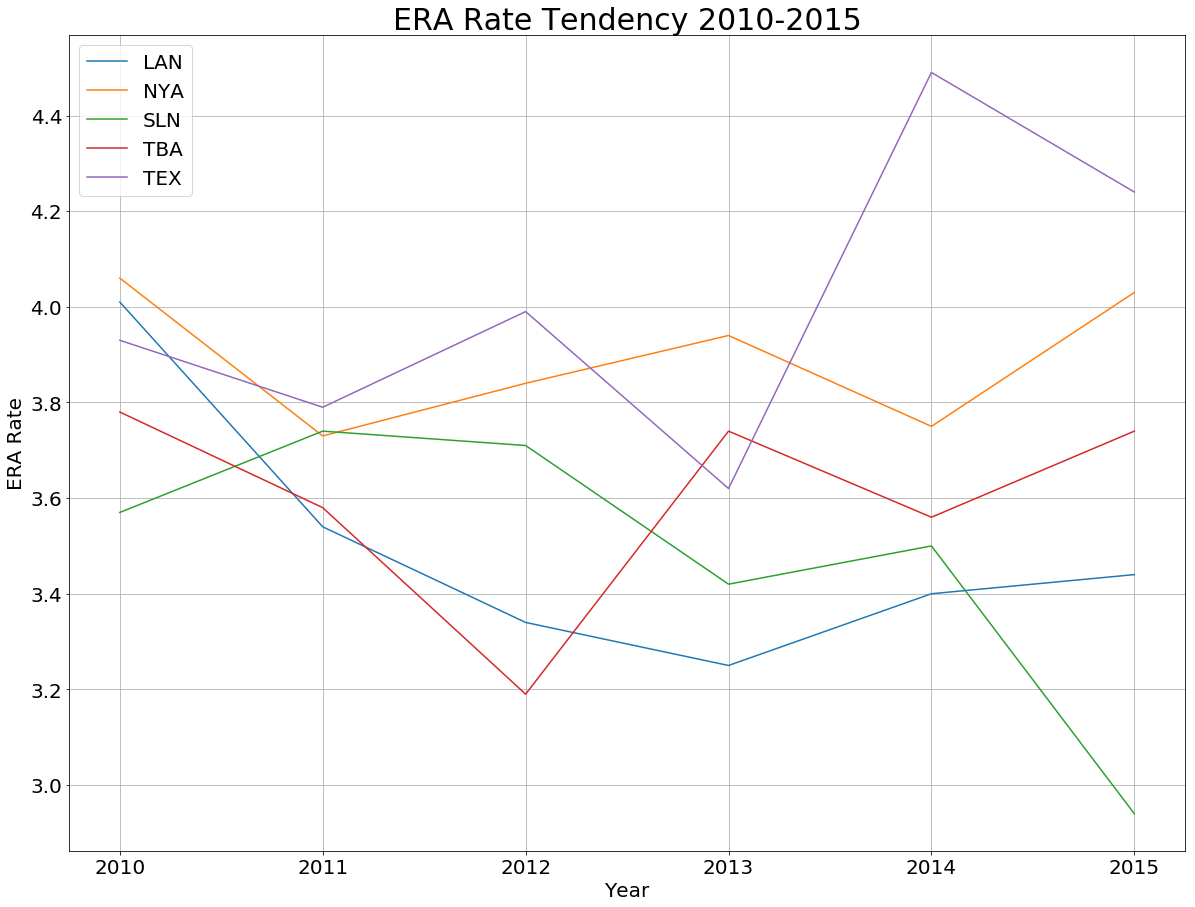

In [194]:
# 4.3) How are their average ERAs changed from 2010-2015 
# new_pitchers=pitchers_recent.loc[(pitchers_recent['teamID']==teams_selected[0])|(pitchers_recent['teamID']==teams_selected[1])|(pitchers_recent['teamID']==teams_selected[2])|(pitchers_recent['teamID']==teams_selected[3])|(pitchers_recent['teamID']==teams_selected[4])]
# new_pichers2=new_pitchers.groupby(['teamID','yearID']).sum().reset_index()
ERA_second = team_ERA[['teamID','yearID','ERA']].groupby(['teamID','yearID']).mean().reset_index()
ERA_third = ERA_second.loc[(ERA_second['teamID']==teams_selected[0])|(ERA_second['teamID']==teams_selected[1])|(ERA_second['teamID']==teams_selected[2])|(ERA_second['teamID']==teams_selected[3])|(ERA_second['teamID']==teams_selected[4])]
fig,ax=plt.subplots(figsize=(20,15))
for key, grp in ERA_third.groupby(['teamID']):
    ax=grp.plot(ax=ax,kind='line',x='yearID',y='ERA',label=key)
plt.legend(loc='best',fontsize=20)
plt.title('ERA Rate Tendency 2010-2015',fontsize=30)
plt.ylabel('ERA Rate',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

#Use the line graph

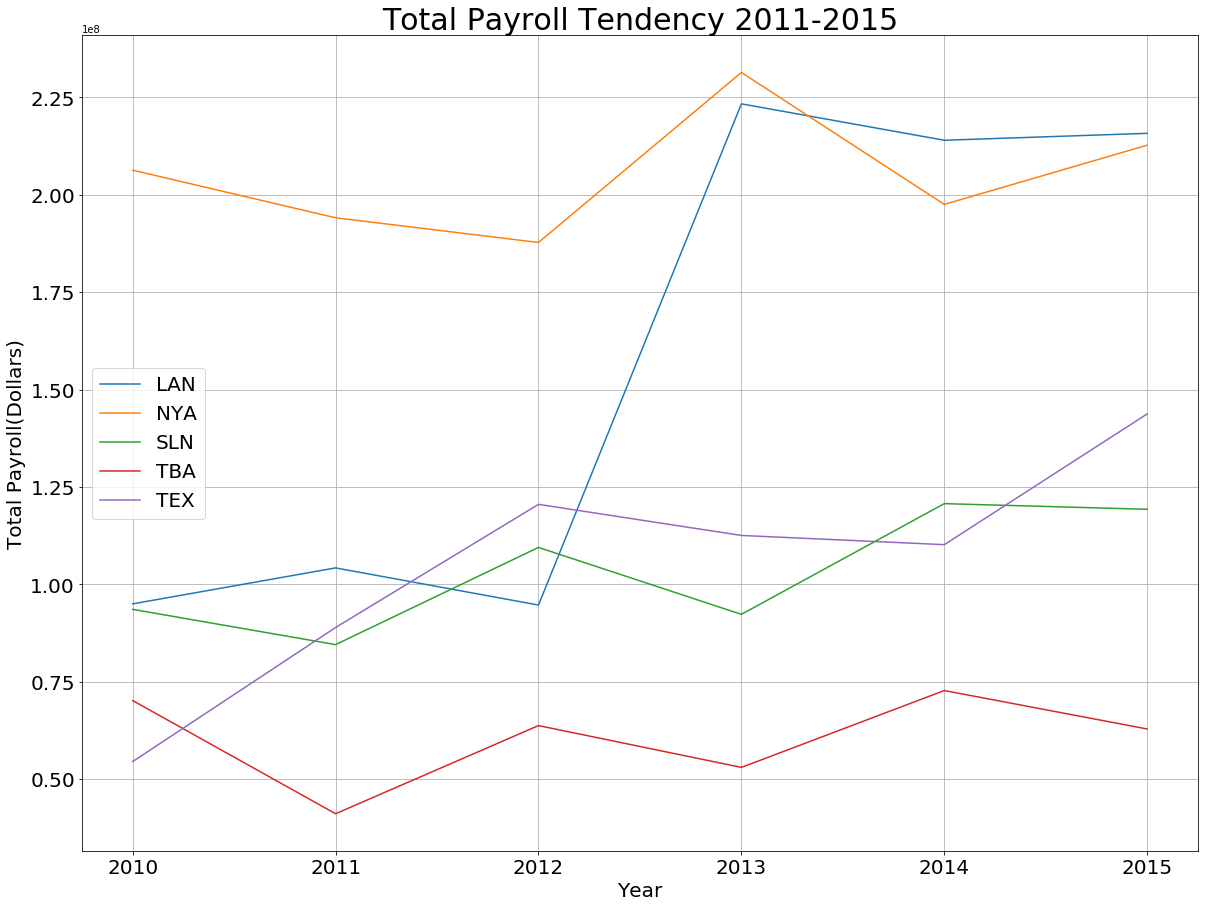

In [195]:
# 4.4) How are their annual payrolls changed from 2010-2015

fig,ax=plt.subplots(figsize=(20,15))
for key, grp in clean_players.groupby(['teamID']):
    ax=grp.plot(ax=ax,kind='line',x='yearID',y='salary',label=key)
plt.legend(loc='best',fontsize=20)
plt.title('Total Payroll Tendency 2011-2015',fontsize=30)
plt.ylabel('Total Payroll(Dollars)',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

#Use the line graph